In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from pandas_datareader import data

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
stck_list = ['IBM','INTC','TWTR','F','NFLX','TSLA']

In [8]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [9]:
for stock in stck_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [10]:
IBM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-20,138.546844,132.600388,136.711288,133.814529,14237838.0,127.449547
2021-07-21,135.172089,133.508606,133.814529,135.086044,5024984.0,128.660568
2021-07-22,135.573608,134.235184,135.430206,134.521988,3466653.0,128.123352
2021-07-23,135.468445,134.158707,134.761002,135.124283,4680013.0,128.696991
2021-07-26,136.711288,134.923523,135.172089,136.491394,4441630.0,129.999084


<AxesSubplot:xlabel='Date'>

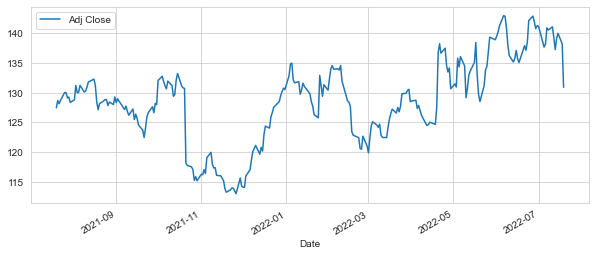

In [11]:
IBM['Adj Close'].plot(legend = True,figsize=(10,4)) 

The above plot represents the Ajusted Closing Price for the IBM stock since July 2021. From the above plot we can observe that initially the adjusted closing price of the stock was nearly $ 125 and it gradually increased to 133 approximately and since then the price got decreased  it reached till $118 approximately.From October it started uplifting and reached to the best closing price of the year which is $134 approx in November. Then suddenly it drastically slumped to nearly $115 and gradually it got to its lowest point nearly $111 in December. From Januay 2022 the price got gredually increased and it reached $135 and the price was increasing and decreasing till it reached the pinaccle 0f around $148. So currently the adjusted price is nearly $135.


<AxesSubplot:xlabel='Date'>

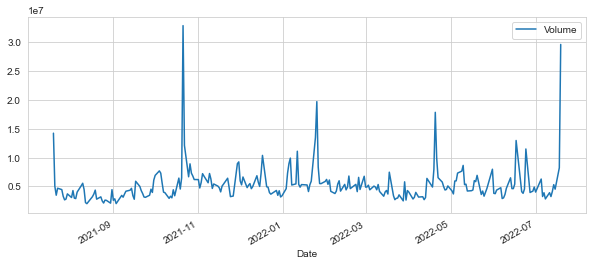

In [12]:
IBM['Volume'].plot(legend = True,figsize=(10,4))

Calculating The Moving Average

In [13]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    IBM[column_name] = IBM['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

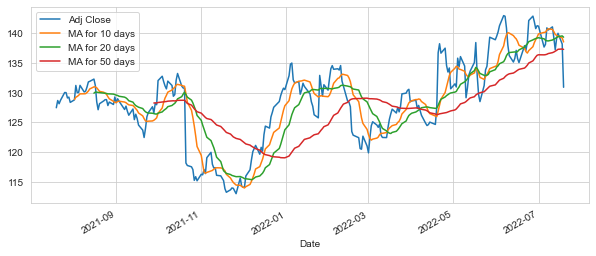

In [14]:
IBM[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

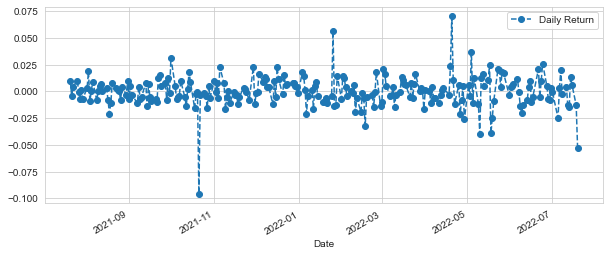

In [15]:
IBM['Daily Return'] = IBM['Adj Close'].pct_change()
IBM['Daily Return'].plot(figsize = (10,4),legend = True,linestyle='--',marker='o')

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

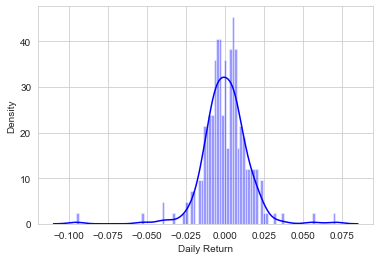

In [16]:
sns.distplot(IBM['Daily Return'].dropna(),bins=100,color='blue')

In [17]:
#To analyse all the returns of all the stock in our list
#Creating a Data Frame with Closing date
closing_df = DataReader(stck_list,'yahoo',start,end)['Adj Close']

In [18]:
stck_rets = closing_df.pct_change()

In [19]:
stck_rets.head()

Symbols,IBM,INTC,TWTR,F,NFLX,TSLA
Date,,,,,,
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-21,0.009502,0.017922,0.023550,0.020129,-0.032803,-0.007888
2021-07-22,-0.004175,-0.004802,0.000431,-0.019732,-0.003621,-0.009202
2021-07-23,0.004477,-0.052895,0.030473,-0.006470,0.007113,-0.009056
2021-07-26,0.010117,0.024717,-0.041847,0.015195,0.002095,0.022133


D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


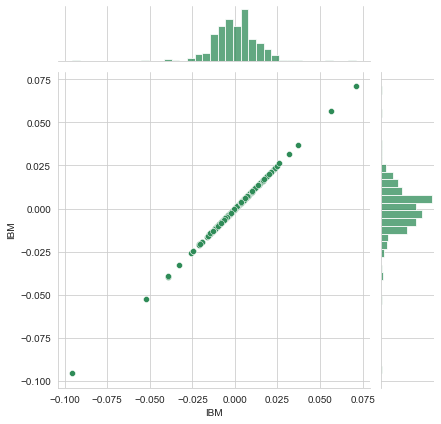

In [20]:
sns.jointplot('IBM','IBM',stck_rets,kind = 'scatter',color='seagreen')

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


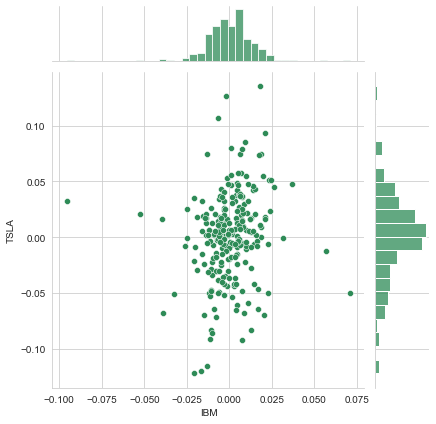

In [21]:
sns.jointplot('IBM','TSLA',stck_rets,kind = 'scatter',color='seagreen')

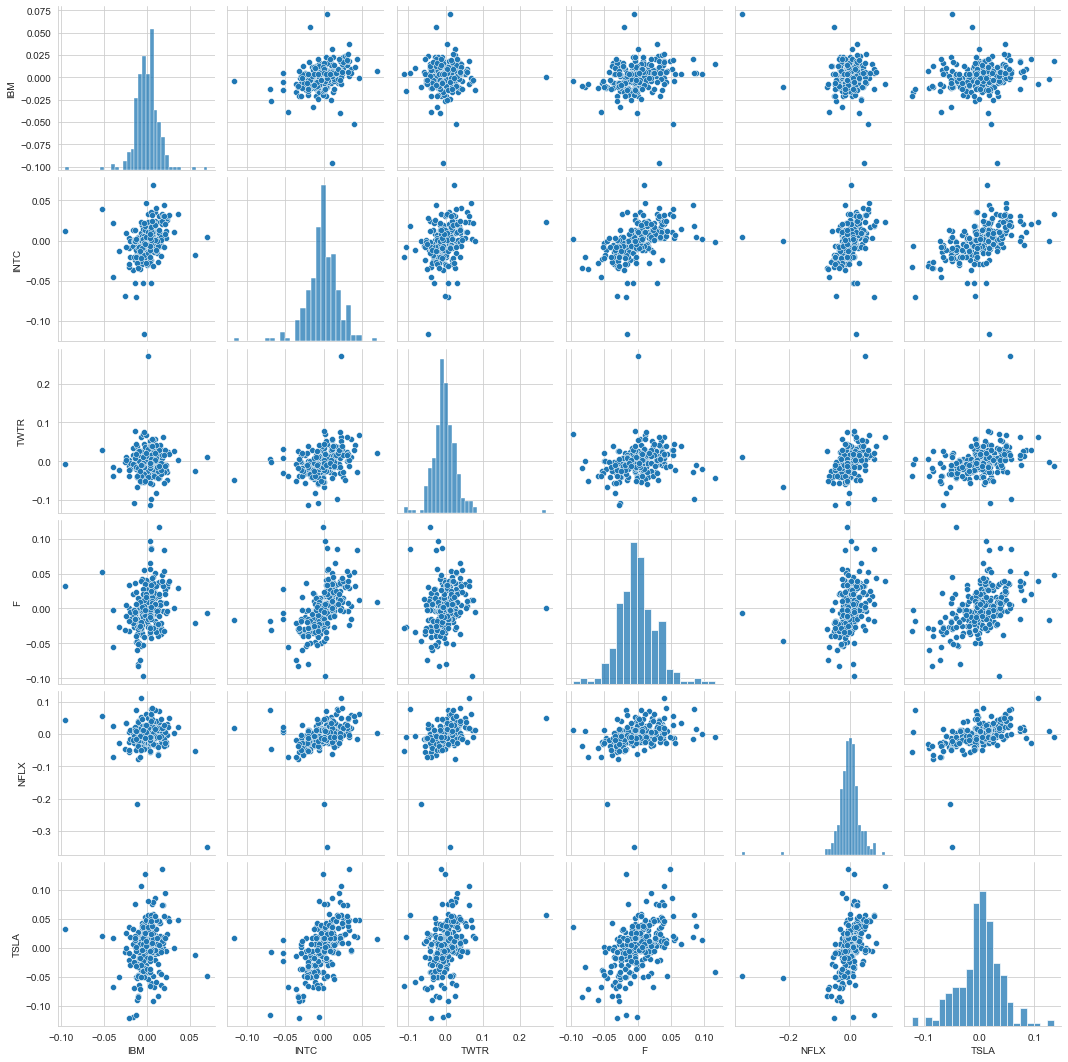

In [22]:
sns.pairplot(stck_rets.dropna())
#We have Histogram for every stock for daily return

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

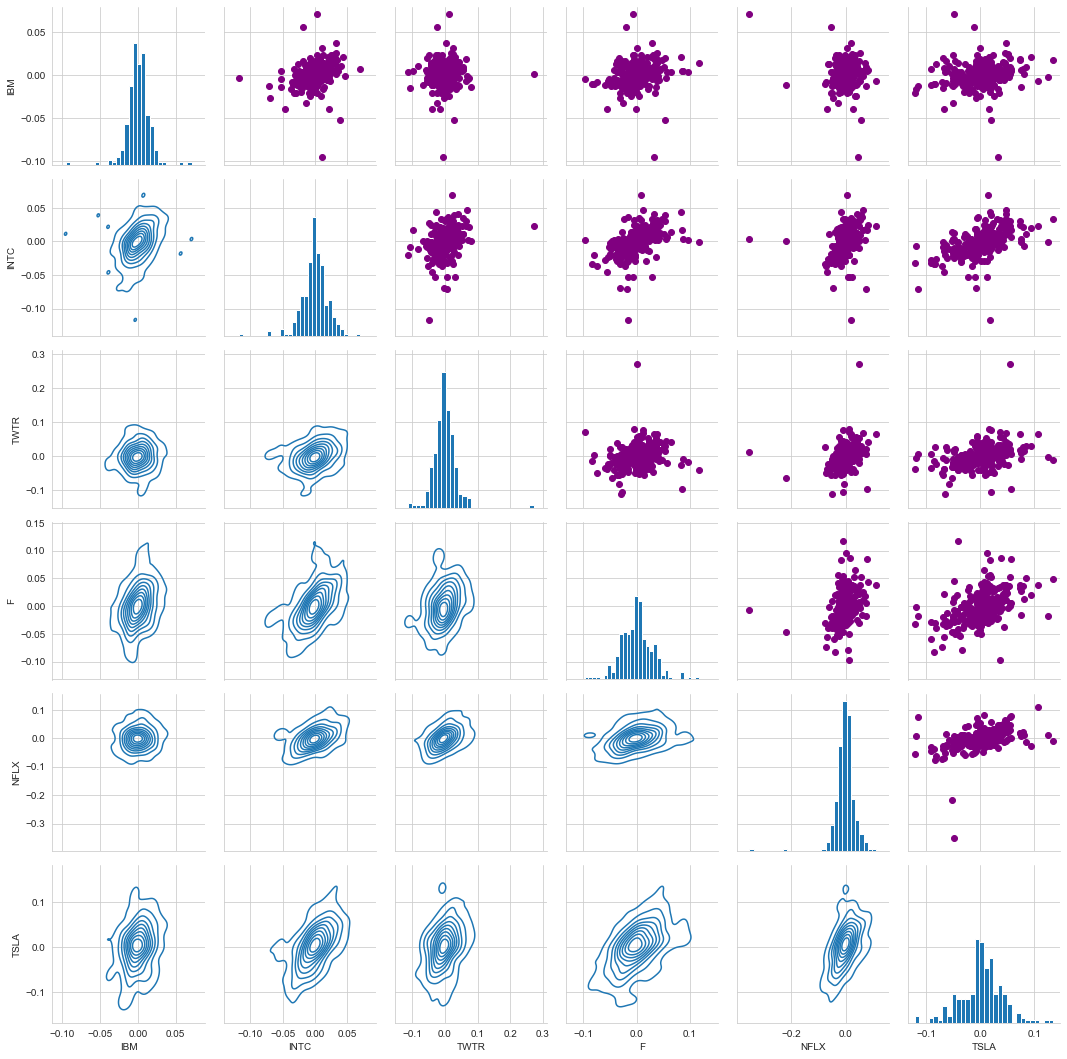

In [23]:
returns_fig = sns.PairGrid(stck_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'c_map'
  cset = contour_func(
D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:1210: UserW

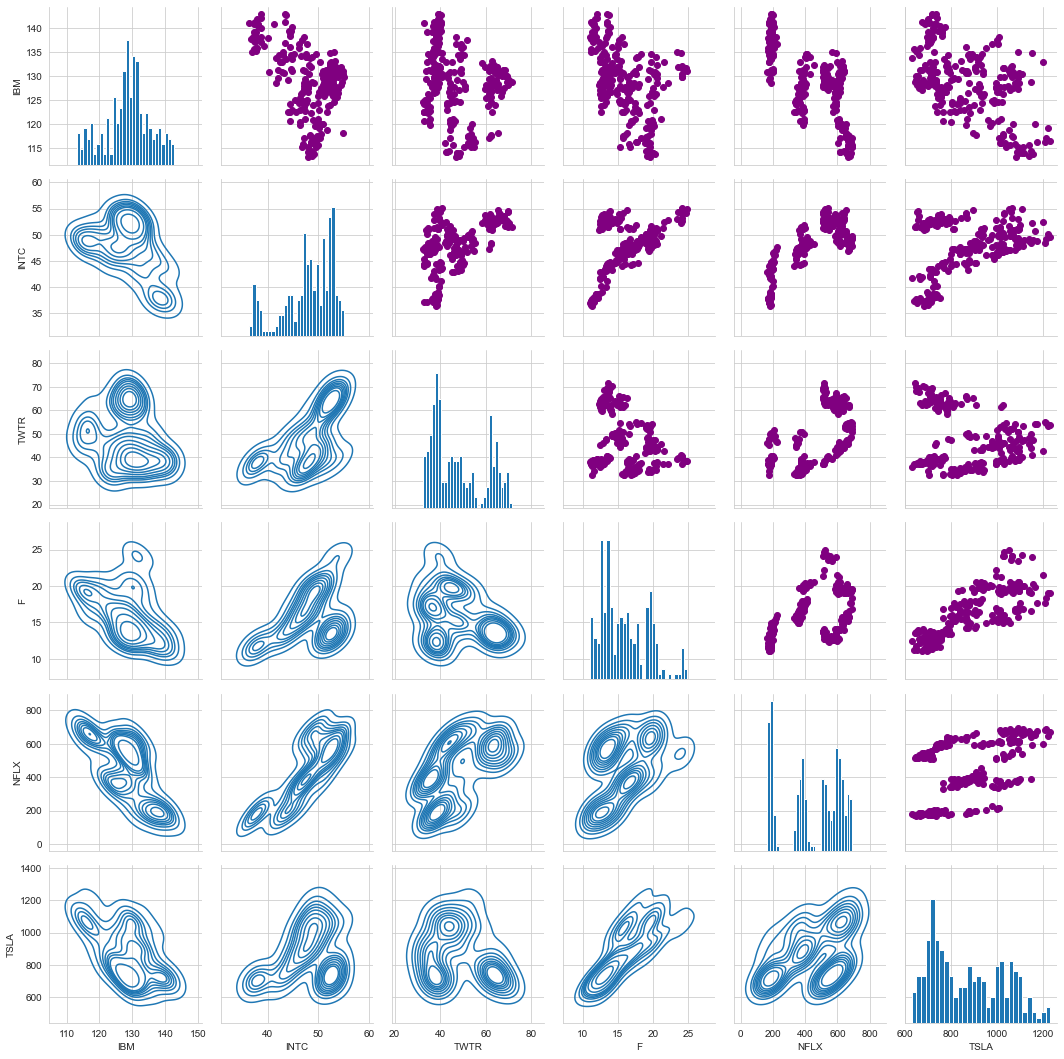

In [24]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,c_map='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

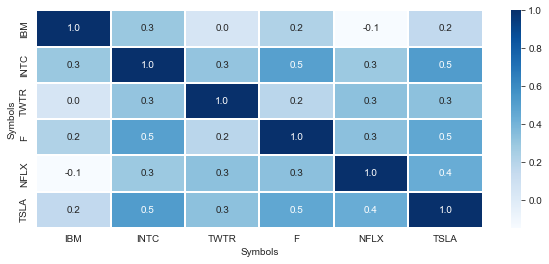

In [25]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(stck_rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

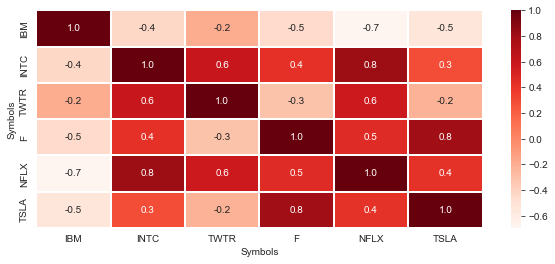

In [26]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(closing_df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Reds")
plt.show() 

In [27]:
rets = stck_rets.dropna()

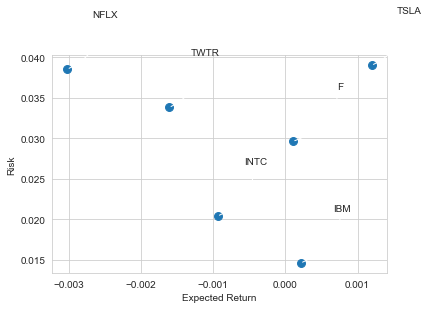

In [28]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha= 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

In [29]:
rets.head()

Symbols,IBM,INTC,TWTR,F,NFLX,TSLA
Date,,,,,,
2021-07-21,0.009502,0.017922,0.023550,0.020129,-0.032803,-0.007888
2021-07-22,-0.004175,-0.004802,0.000431,-0.019732,-0.003621,-0.009202
2021-07-23,0.004477,-0.052895,0.030473,-0.006470,0.007113,-0.009056
2021-07-26,0.010117,0.024717,-0.041847,0.015195,0.002095,0.022133
2021-07-27,-0.000140,-0.020806,-0.005241,-0.017106,0.004685,-0.019525


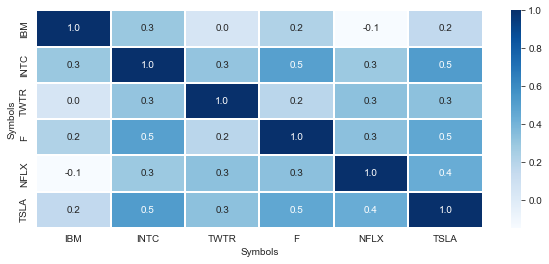

In [30]:
f,ax = plt.subplots(figsize=(10, 4))
sns.heatmap(rets.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues")
plt.show() 

D:\ProgramData\Anaconda3\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

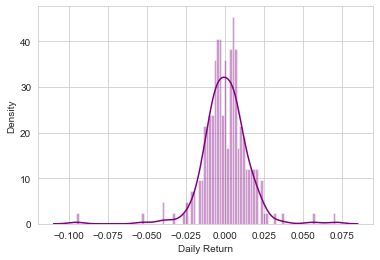

In [31]:
sns.distplot(IBM['Daily Return'].dropna(),bins=100,color='purple')

In [32]:
rets.head()

Symbols,IBM,INTC,TWTR,F,NFLX,TSLA
Date,,,,,,
2021-07-21,0.009502,0.017922,0.023550,0.020129,-0.032803,-0.007888
2021-07-22,-0.004175,-0.004802,0.000431,-0.019732,-0.003621,-0.009202
2021-07-23,0.004477,-0.052895,0.030473,-0.006470,0.007113,-0.009056
2021-07-26,0.010117,0.024717,-0.041847,0.015195,0.002095,0.022133
2021-07-27,-0.000140,-0.020806,-0.005241,-0.017106,0.004685,-0.019525


In [33]:
rets['IBM'].quantile(0.05)

-0.019229631544548487

$\Delta$ S/S = U$\Delta$t+$\sigma$ $\sqrt{t}$
 - S represents Stock Price 
 - mu is expected return
 - sigma is standard deviation of the return
 - t is time and
 - epsilon is random variable

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [35]:
IBM.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-07-20,138.546844,132.600388,136.711288,133.814529,14237838.0,127.449547,NaN,NaN,NaN,NaN
2021-07-21,135.172089,133.508606,133.814529,135.086044,5024984.0,128.660568,NaN,NaN,NaN,0.009502
2021-07-22,135.573608,134.235184,135.430206,134.521988,3466653.0,128.123352,NaN,NaN,NaN,-0.004175
2021-07-23,135.468445,134.158707,134.761002,135.124283,4680013.0,128.696991,NaN,NaN,NaN,0.004477
2021-07-26,136.711288,134.923523,135.172089,136.491394,4441630.0,129.999084,NaN,NaN,NaN,0.010118


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

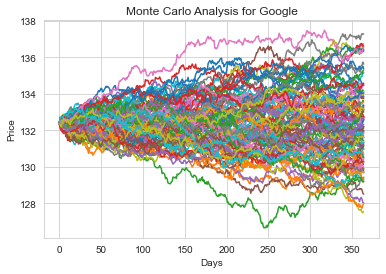

In [36]:
start_price = 132.39
days = 365
dt = 1/days
mu = rets.mean()['IBM']
sigma = rets.std()['IBM']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [37]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

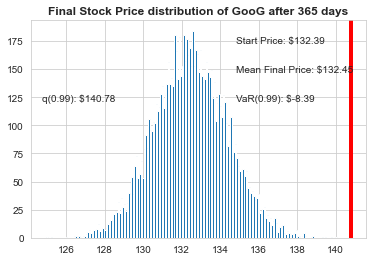

In [38]:
q = np.quantile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s = "Start Price: $%.2f" %start_price)
plt.figtext(0.6,0.7, "Mean Final Price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price-q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title(u"Final Stock Price distribution of GooG after %s days" % days,weight='bold');
